In [7]:
ls

AI361L(NLP)/
Training_Word2Vec_using_Gensim_library.ipynb
Untitled.ipynb
codes 2/
nlp lab final/
tweets.csv


In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import random
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

# Loading Dataset

In [64]:
df=pd.read_csv("tweets.csv")

/var/folders/n9/v81_nd7n2xj6p12w5fs5nxp00000gn/T/ipykernel_1269/3913245685.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("tweets.csv")


In [65]:
df=df[:500]

# Exploratory Data Analysis

In [15]:

Meaning1=Counter(df['user_location'])

In [33]:
def plotting_for_meaning(Meanings):

    x = [str(names) for names in Meanings.keys()]
    y = list(Meanings.values())
    y15=y[:15]
    X15=x[:15]
    X15.sort(reverse=True)
    y15.sort(reverse=True)
    plt.bar(X15, y15)
    plt.show()

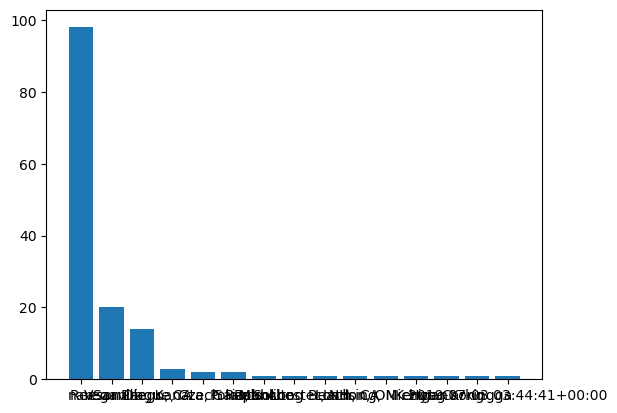

In [34]:
plotting_for_meaning(Meaning1)

In [26]:

Meaning2=Counter(df['user_followers'])

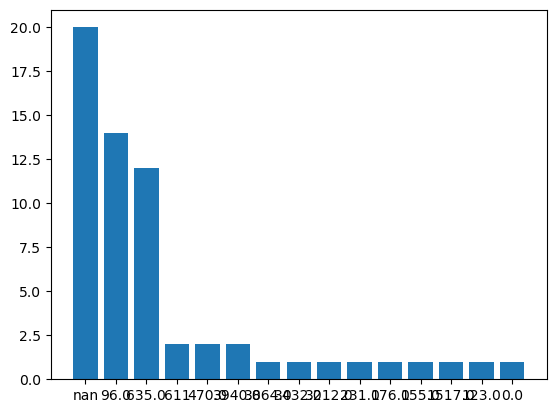

In [35]:
plotting_for_meaning(Meaning2)

In [36]:

Meaning3=Counter(df['user_favourites'])

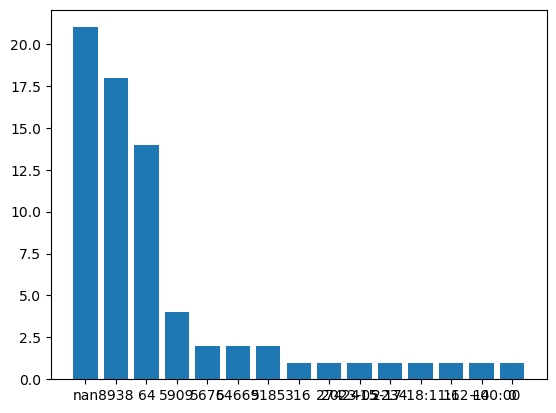

In [37]:
plotting_for_meaning(Meaning3)

In [40]:
Meaning4=Counter(df['user_friends'])

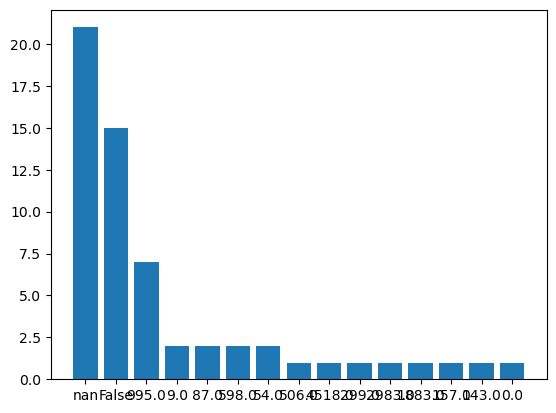

In [41]:
plotting_for_meaning(Meaning4)

In [42]:
Meaning5=Counter(df['user_verified'])

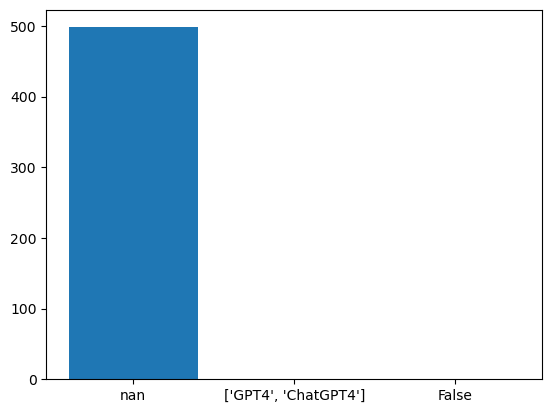

In [46]:
plotting_for_meaning(Meaning5)

# Q2  Pre processing & Cleaning

# Removing Duplicates rows 

In [67]:

Dup_Rows = df[df.duplicated()]

print("\n\nDuplicate Rows : \n {}".format(Dup_Rows))




Duplicate Rows : 
 Empty DataFrame
Columns: [user_name, text, user_location, user_description, user_created, user_followers, user_friends, user_favourites, user_verified, date, hashtags, source]
Index: []


# Removing  rows with missing Values 

In [68]:
df = df.dropna(axis = 0, how ='any') 
    

In [71]:
#Y=df['user_verified']

# Normalize the data

# Clean the text

In [181]:
import string
regular_punct = list(string.punctuation)
def clean_the_text(text):
    for punc in regular_punct:
        if punc in text:
            text = text.replace(punc, ' ')
    return text.strip()
    

In [182]:
for senetnces in df['text']:
    print(clean_the_text(senetnces))

ChatGPT Thinks These 5 Crypto Coins Will Explode This Year   Yahoo Finance  chatgpt  AI  openAI https   t co tFOdU0qnDz
New   JWVance s post about 5  startups  including  VcinityInc  that won the 1st  startup50 challenge  thx to  ChatGPT   based on answers about macro economic pressures  VC funding  track record of management team  amp  growth potential of the market sector   https   t co JXG37AMjh5
🚨Get Out 🚨
💰 Binance Spot💰
⬇ Recommendation   Short 🔴
Ticker    GHSTUSDT
Time Interval   5min
Last Price  0 956
🔴 RSI  88 3

Powered by  ChatGPT

 GHST
 GHST
 AlphaQuarkToken
 저스트

What are you gonna do 
👇LONG        👇WAIT         👇SHORT https   t co QIqgtT11Aa
Video   Show a company s logo based on the website domain    Short 💻 📹   https   t co swo1GNqbEa 👈🏼Get the  CompanyLogo  API that does what  chatGPT cannot do https   t co vSLBWtAtfx
I just used my  CerberusGPT HologeneticsLab and my simulated Hologenetic digital organic supercomputer to create an internal revision system for  ChatGP

# Removing Stop world 

In [117]:
 

list2=[ val for val in df['text'] if val not in stop_word]
    
    

# Stemming the words 


In [121]:
s1=PorterStemmer()
stemming=[s1.stem(words) for words in list2 ]

# Lemmatize the words 

In [123]:
lem=WordNetLemmatizer()
lemmatize=[lem.lemmatize(words) for words in list2 ]

# Removing punctuation

In [164]:
import string
regular_punct = list(string.punctuation)
def remove_punctuation(text,punct_list):
    for punc in punct_list:
        if punc in text:
            text = text.replace(punc, ' ')
    return text.strip()
for senetences in df['text']:
    print(remove_punctuation(senetences,regular_punct))

ChatGPT Thinks These 5 Crypto Coins Will Explode This Year   Yahoo Finance  chatgpt  AI  openAI https   t co tFOdU0qnDz
New   JWVance s post about 5  startups  including  VcinityInc  that won the 1st  startup50 challenge  thx to  ChatGPT   based on answers about macro economic pressures  VC funding  track record of management team  amp  growth potential of the market sector   https   t co JXG37AMjh5
🚨Get Out 🚨
💰 Binance Spot💰
⬇ Recommendation   Short 🔴
Ticker    GHSTUSDT
Time Interval   5min
Last Price  0 956
🔴 RSI  88 3

Powered by  ChatGPT

 GHST
 GHST
 AlphaQuarkToken
 저스트

What are you gonna do 
👇LONG        👇WAIT         👇SHORT https   t co QIqgtT11Aa
Video   Show a company s logo based on the website domain    Short 💻 📹   https   t co swo1GNqbEa 👈🏼Get the  CompanyLogo  API that does what  chatGPT cannot do https   t co vSLBWtAtfx
I just used my  CerberusGPT HologeneticsLab and my simulated Hologenetic digital organic supercomputer to create an internal revision system for  ChatGP

# Removing Links

In [124]:
URL=[]
list1=[]
for words in list2:
    if words.startswith("https"):
        URL.append(words)

In [175]:

list1=[words for words in list2 if words not in list1]

# Remove Special characters

In [178]:
import re
for senetnces in df['text']:
    filteredText=re.sub('[^A-Za-z0-9.]+', ' ',senetnces)
    print(filteredText)

ChatGPT Thinks These 5 Crypto Coins Will Explode This Year Yahoo Finance chatgpt AI openAI https t.co tFOdU0qnDz
New JWVance s post about 5 startups including VcinityInc that won the 1st startup50 challenge thx to ChatGPT based on answers about macro economic pressures VC funding track record of management team amp growth potential of the market sector. https t.co JXG37AMjh5
 Get Out Binance Spot Recommendation Short Ticker GHSTUSDT Time Interval 5min Last Price 0.956 RSI 88.3 Powered by ChatGPT GHST GHST AlphaQuarkToken What are you gonna do LONG WAIT SHORT https t.co QIqgtT11Aa
Video Show a company s logo based on the website domain Short https t.co swo1GNqbEa Get the CompanyLogo API that does what chatGPT cannot do https t.co vSLBWtAtfx
I just used my CerberusGPT HologeneticsLab and my simulated Hologenetic digital organic supercomputer to create an internal revision system for ChatGPT based on organic processes. Even if my system is subject to a security breach not likely such as a

# Q 3 NGram analysis 

# Bi Grams analysis 

In [126]:
list3=[]
for w in range(len(list2)-1):
    list3.append(list2[w]+" "+list2[w+1])

In [127]:
freq = Counter(list3)

In [133]:
def plotting(object1):
    x = [str(ngram) for ngram in object1.keys()]
    y = list(object1.values())
    y15=y[:10]
    X15=x[:10]
    x.sort(reverse=True)
    y15.sort(reverse=True)
    plt.bar(X15, y15)

/Users/student/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from current font.
  func(*args, **kwargs)
/Users/student/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from current font.
  func(*args, **kwargs)
/Users/student/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from current font.
  func(*args, **kwargs)
/Users/student/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from current font.
  func(*args, **kwargs)
/Users/student/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  func(*args, **kwargs)
/Users/student/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning:

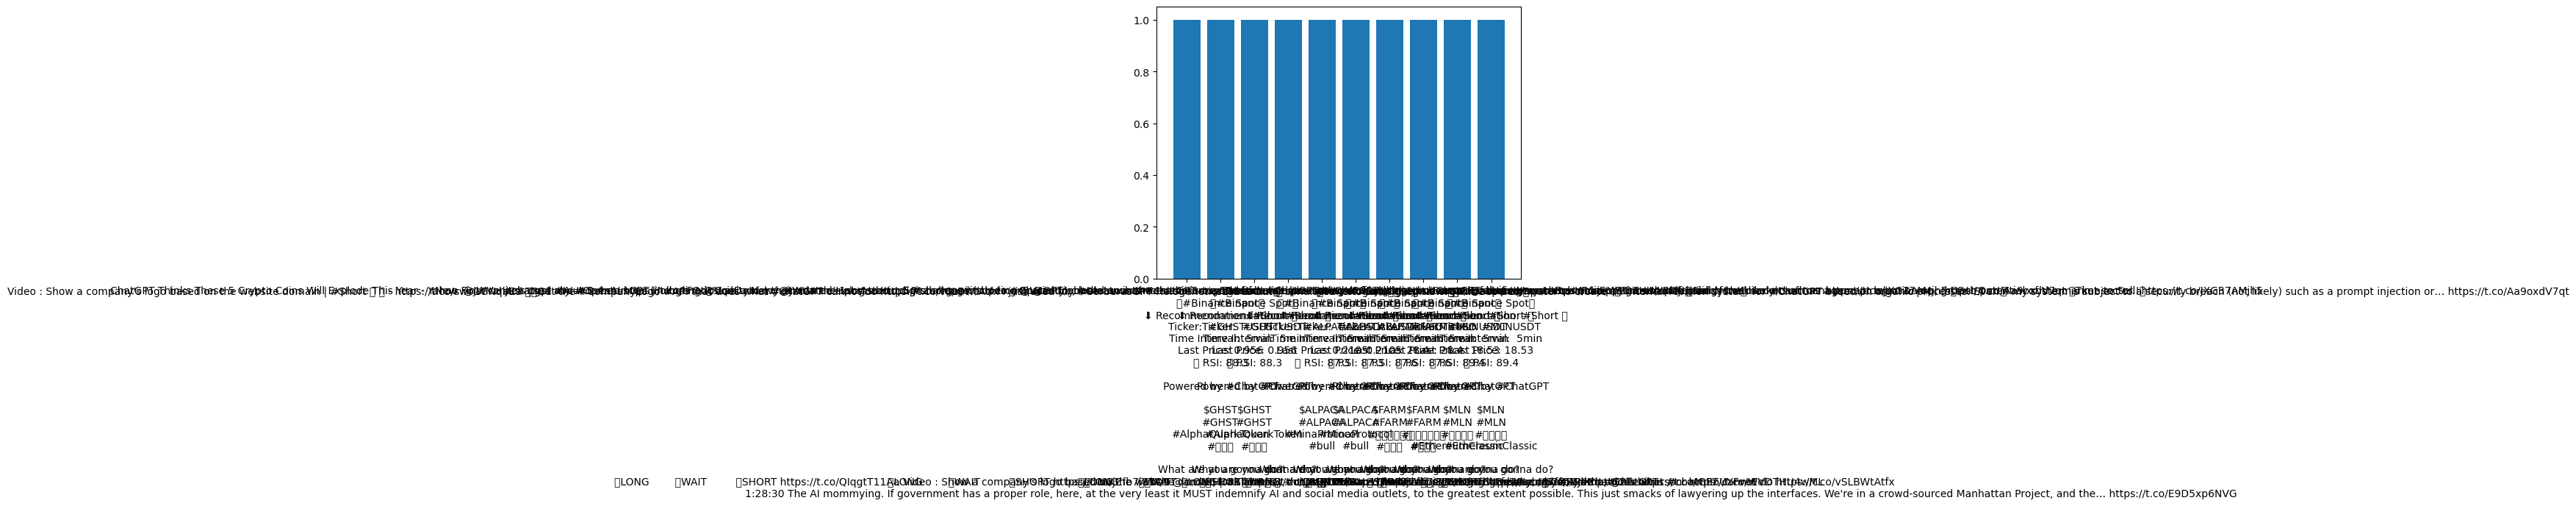

In [134]:
plotting(freq)

# Trigrams

In [136]:
list4=[]
for w in range(len(list2)-2):
    list4.append(list2[w]+" "+list2[w+1]+""+list2[w+2])

In [137]:
freq = Counter(list4)

/Users/student/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from current font.
  func(*args, **kwargs)
/Users/student/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from current font.
  func(*args, **kwargs)
/Users/student/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from current font.
  func(*args, **kwargs)
/Users/student/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from current font.
  func(*args, **kwargs)
/Users/student/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  func(*args, **kwargs)
/Users/student/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning:

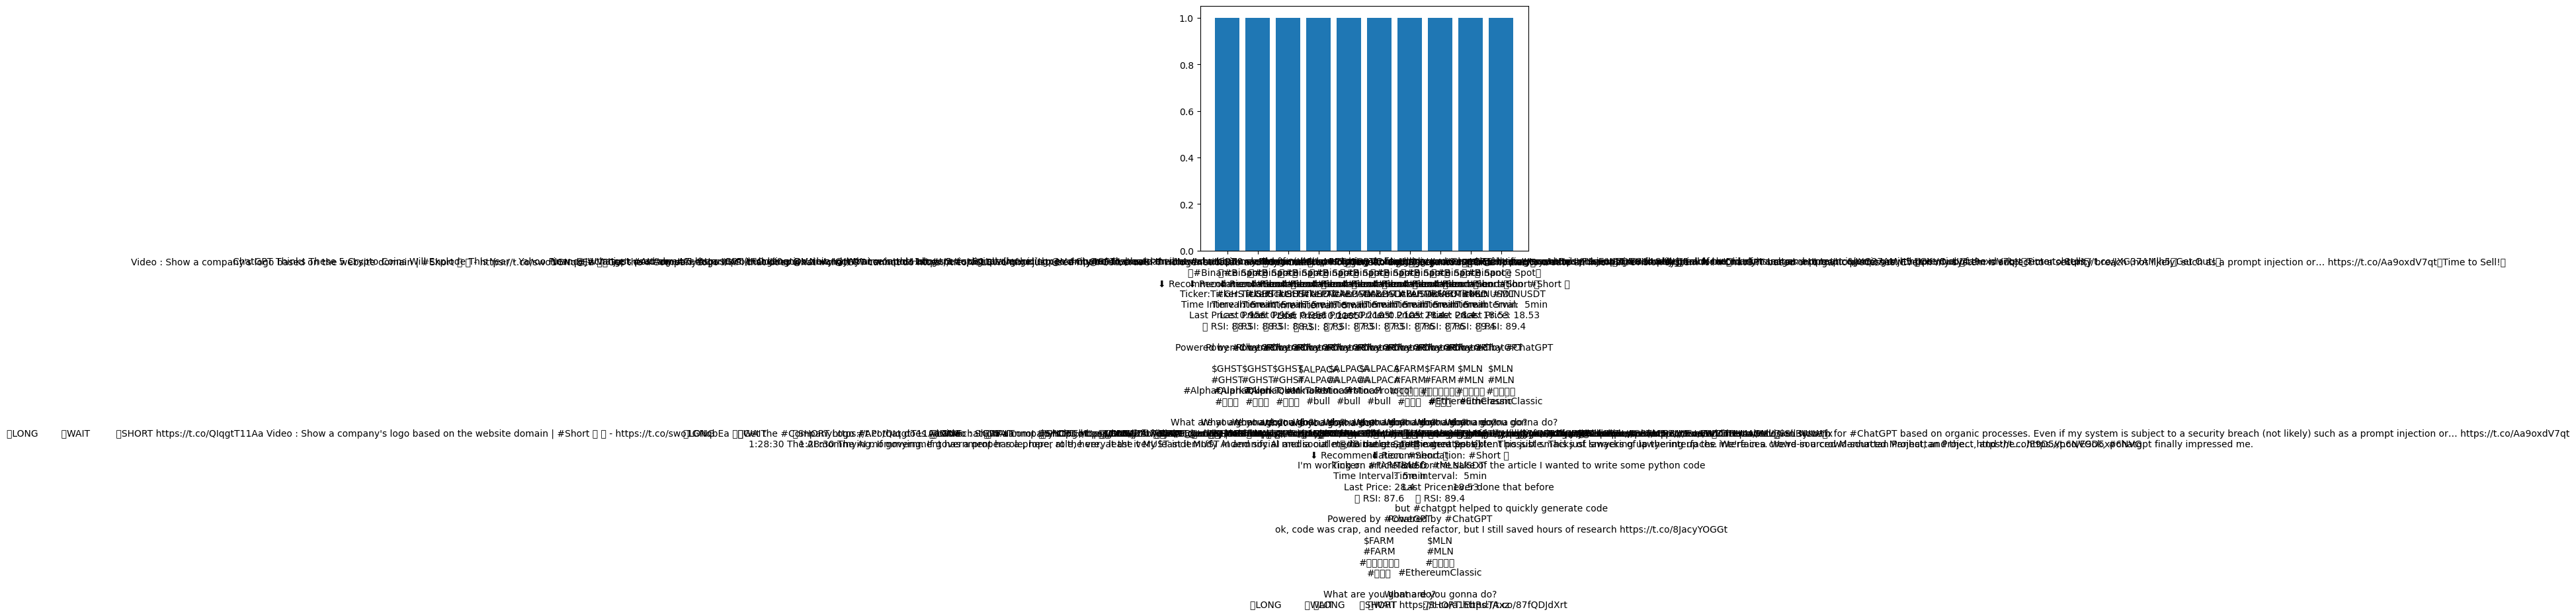

In [138]:
plotting(freq)

# Word cloud 

In [139]:
withOut_stop_words=[words for words in df['text']]

In [140]:
freq = Counter(withOut_stop_words)

/Users/student/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from current font.
  func(*args, **kwargs)
/Users/student/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from current font.
  func(*args, **kwargs)
/Users/student/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from current font.
  func(*args, **kwargs)
/Users/student/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from current font.
  func(*args, **kwargs)
/Users/student/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  func(*args, **kwargs)
/Users/student/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning:

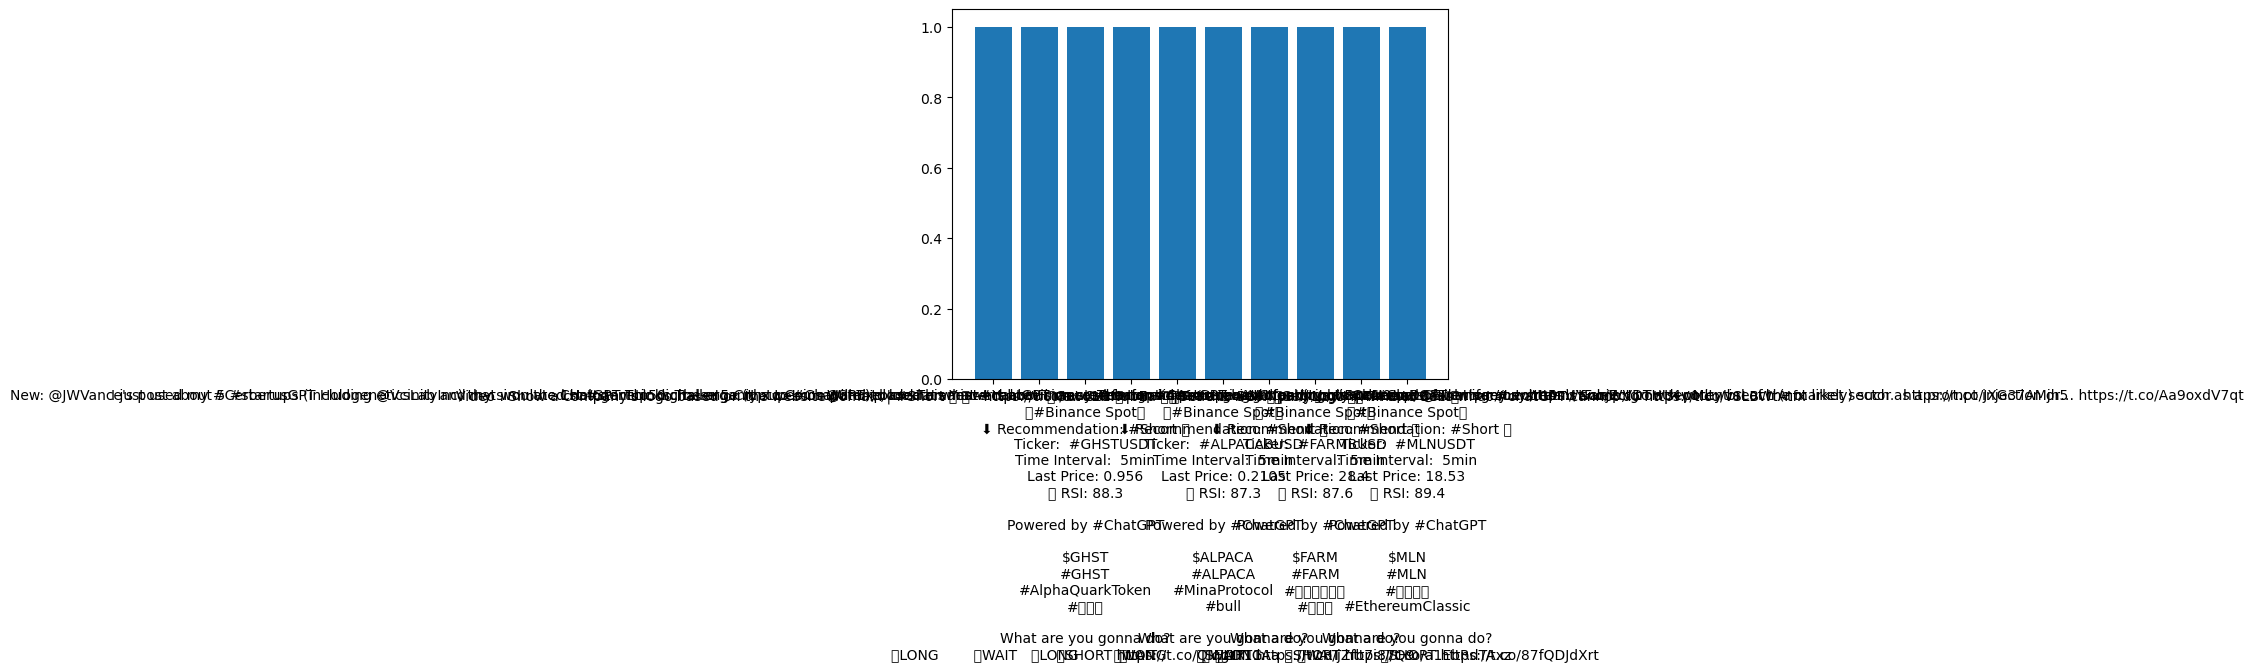

In [141]:
plotting(freq)

# Q 4 Sentimental analysis 

In [261]:
def sentiment_analysis(tweet):
 def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
 #Create a function to get the polarity
 def getPolarity(text):
   return TextBlob(text).sentiment.polarity
  
 #Create two new columns ‘Subjectivity’ & ‘Polarity’
 tweet[‘TextBlob_Subjectivity’] =    tweet[‘tweet’].apply(getSubjectivity)
 tweet [‘TextBlob_Polarity’] = tweet[‘tweet’].apply(getPolarity)
 def getAnalysis(score):
  if score < 0:
    return ‘Negative’
  elif score == 0:
    return ‘Neutral’
  else:
    return ‘Positive’
    tweet [‘TextBlob_Analysis’] = tweet  [‘TextBlob_Polarity’].apply(getAnalysis )
    return tweet

SyntaxError: invalid character '‘' (U+2018) (3503403946.py, line 10)

# Q 5 Features Engineering 

# Calculate length of senetences 

In [143]:
count=0
for sentences in df['text']:
    count=count+1
print("Total number of sentences is ",count)

Total number of sentences is  274


# Count the number of words in a text

In [146]:
count=0
for sentences in df['text']:
    for words in sentences:
        count=count+1
print("Total number of words is ",count)

Total number of words is  52257


# Count the number of spaces 

In [147]:
count=0
for sentences in df['text']:
    for words in sentences:
        if words.startswith(" "):
            count=count+1
print("Total number of spaces  is ",count)

Total number of spaces  is  6559


# Count the number of characters

In [148]:
count=0
for sentences in df['text']:
    for words in sentences:
        for char in words:
            count=count+1
print("Total number of spaces  is ",count)

Total number of spaces  is  52257


# Count the number of verbs

In [151]:
pos_tags=nltk.pos_tag(list2)
   

In [161]:
count=0
for i in pos_tags:
    for pos in i:
        if pos=='V':
            count=count+1
print("Total number of Verbs occur in text",count)

Total number of Verbs occur in text 0


# letter starts with M

In [162]:
count=0
for sentences in df['text']:
    for words in sentences:
        if words.startswith("M"):
            count=count+1
print("Total number of spaces  is ",count)

Total number of spaces  is  206


# Q 6 (Vectorization)

In [187]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [202]:
Model=CountVectorizer()
CountVect_df=Model.fit_transform(df['text'])

In [186]:
Model.get_feature_names_out()

array(['00334', '00618', '0062', ..., '이캐시', '저스트', '코스모스'], dtype=object)

In [203]:
Model2=TfidfVectorizer()
TfIDF_df=Model2.fit_transform(df['text'])

In [204]:
TfIDF_df.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.23211401,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [199]:
import gensim
from gensim.models import Word2Vec
sentences = ['ChatGPT Thinks These 5 Crypto ','New: @JWVance','Video : Show a company']
word2vec_model = Word2Vec(sentences, window=2, min_count=1)
# Step 4: Convert sentences to feature vectors using Word2Vec embeddings
def sentence_to_vector(sentence):
    vector = np.zeros(word2vec_model.vector_size)
    num_words = 0
    for word in sentence:
        if word in word2vec_model.wv:
            vector += word2vec_model.wv[word]
            num_words += 1
    if num_words > 0:
        vector /= num_words
    return vector


In [201]:
for senetnces in df['text']:
    print(sentence_to_vector(senetnces))

[-2.15726292e-03  1.82476546e-03  5.23844025e-04  1.89133521e-03
 -6.40773378e-04 -1.57722698e-03  1.54060371e-03  2.78151368e-03
 -3.07621313e-03 -1.28614232e-03  1.17969973e-03 -1.55135795e-03
 -7.92400502e-04  1.54804998e-03  3.44750446e-04 -2.21121427e-05
  2.62380353e-03  1.52446755e-03 -2.90671291e-03 -4.43826988e-03
  1.76773481e-03  8.54044872e-04  5.16114685e-03  6.85307334e-04
  1.17151950e-03  8.88889724e-04 -7.56266712e-04  4.72331947e-04
 -2.11071427e-03  6.00884804e-04  2.00061560e-03 -1.22680275e-03
  2.07428313e-03 -2.73755032e-03 -7.02790666e-05  1.08445191e-03
  1.63660874e-03 -1.61015157e-05 -1.01979757e-03 -1.36535003e-03
 -4.41008876e-04 -8.71348007e-04 -2.71471477e-03  7.25238636e-04
  1.03455591e-03  3.74343203e-05 -2.66074044e-03 -1.69005358e-05
  1.22549435e-03  8.34872409e-04 -1.15677896e-03 -1.43516560e-03
 -2.14817972e-03 -5.70221054e-04 -4.22559007e-04 -8.72868826e-04
  1.18297229e-03 -2.43004541e-03 -1.33965427e-03  1.46456063e-03
  2.26516177e-05 -3.36523

# Q 7 Feature Selection

In [220]:

X = df.drop("user_verified",1)   #Feature Matrix
y = df["user_verified"]          #Target Variable
df.head()

/var/folders/n9/v81_nd7n2xj6p12w5fs5nxp00000gn/T/ipykernel_1269/4200766478.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop("user_verified",1)   #Feature Matrix


,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
2,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it
3,Georgiana Comsa,New: @JWVance's post about 5 #startups (includ...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App
4,Bitone Great,🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1
6,ScrapeLogo: acquired by RiteKit in 2015,Video : Show a company's logo based on the web...,"Prague, Czech Republic",Test RiteKit #RESTAPI solutions in demo page. ...,2015-01-31 04:13:07+00:00,176.0,54.0,274,False,2023-05-17 18:09:04+00:00,['Short'],RiteKit App
7,vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵,I just used my #CerberusGPT HologeneticsLab an...,"London, ON",🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...,2021-01-30 21:03:36+00:00,123.0,299.0,8938,False,2023-05-17 18:09:00+00:00,['CerberusGPT'],Twitter Web App


In [227]:
import seaborn as sns
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.feature_selection import f_classif

In [231]:
test = SelectKBest(score_func=f_classif, k=4)


In [234]:
X=df[['user_location','user_followers','user_friends','user_favourites']]

In [235]:
Model=TfidfVectorizer()

In [243]:
df2=pd.read_csv('tweets.csv')

/var/folders/n9/v81_nd7n2xj6p12w5fs5nxp00000gn/T/ipykernel_1269/4144142266.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df2=pd.read_csv('tweets.csv')


In [252]:
df2=df2[10:200]

In [253]:
X=Model.fit_transform(df2[['user_location','user_followers','user_friends','user_favourites']])

In [254]:
Y=Model.fit_transform(df2['user_verified'])

In [255]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [257]:
Model=MultinomialNB()